In [1]:
from google.colab import files

# Upload the kaggle.json file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohamedamr23","key":"c63548f9b1baa4f13b6509cd40f7f67c"}'}

In [2]:
import os

# Create a directory for Kaggle
os.makedirs("/root/.kaggle", exist_ok=True)

# Move the kaggle.json file to the .kaggle folder
!mv kaggle.json /root/.kaggle/

# Set permissions for the kaggle.json file
!chmod 600 /root/.kaggle/kaggle.json


In [3]:
# Use Kaggle API to download the IMDb dataset
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

# Unzip the downloaded dataset
!unzip imdb-dataset-of-50k-movie-reviews.zip


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 39% 10.0M/25.7M [00:00<00:00, 101MB/s]
100% 25.7M/25.7M [00:00<00:00, 165MB/s]
Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("IMDB Dataset.csv")

# Display the first few rows
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
# understanding dataset
print(f'data shape:{df.shape}')

data shape:(50000, 2)


In [7]:
# check for nulls
print(f'data nulls:\n{df.isnull().sum()}')

data nulls:
review       0
sentiment    0
dtype: int64


In [8]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# cleaning dataset

In [9]:
!pip install spacy


In [10]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 64.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [11]:
import re

# Define a custom list of stopwords
stop_words = {
    'a', 'an', 'the', 'and', 'is', 'are', 'was', 'were', 'in', 'of', 'to', 'for', 'on',
    'with', 'at', 'by', 'from', 'as', 'it', 'this', 'that', 'these', 'those', 'am', 'be',
    'been', 'being', 'he', 'she', 'we', 'they', 'you', 'I', 'me', 'him', 'her', 'us', 'them',
    'my', 'your', 'his', 'their', 'our', 'its', 'but', 'or', 'so', 'not', 'no', 'if', 'then',
    'up', 'down', 'out', 'over', 'under', 'again', 'once', 'here', 'there', 'all', 'any', 'both'
}

# Text cleaning function
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters, numbers, and punctuations
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove custom stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply cleaning to the review column
df['cleaned_review'] = df['review'].apply(clean_text)
df.head()


,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one other reviewers has mentioned after watchi...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,i thought wonderful way spend time too hot sum...
3,Basically there's a family where a little boy ...,negative,basically theres family where little boy jake ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


encode sentiment

In [12]:
df['sentiment_encoded']= df['sentiment'].map({'positive':1,'negative':0})
print(df['sentiment_encoded'].value_counts())

sentiment_encoded
1    25000
0    25000
Name: count, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split

X = df['cleaned_review']
y=df['sentiment_encoded']

X_train ,X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


print(f"Training Set: {X_train.shape[0]} samples")
print(f"Testing Set: {X_test.shape[0]} samples")

Training Set: 40000 samples
Testing Set: 10000 samples


**Text Vectorization**

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Top 5000 words

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


print(f"TF-IDF matrix shape: {X_train_tfidf.shape}")

TF-IDF matrix shape: (40000, 5000)


In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_tfidf,y_train)

accuracy = model.score(X_test_tfidf,y_test)

print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 89.13%


In [23]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_tfidf)

print (classification_report(y_test,y_pred))
print (confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

[[4351  610]
 [ 477 4562]]


**Hyperparameter Tuning**

In [24]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Grid search
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train_tfidf, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)

# Evaluate with best model
best_model = grid.best_estimator_
accuracy = best_model.score(X_test_tfidf, y_test)
print(f"Tuned Model Accuracy: {accuracy * 100:.2f}%")


Best Parameters: {'C': 1}
Tuned Model Accuracy: 89.13%


**Prediction new data**

In [25]:
# Example new review
new_review = "This movie was absolutely fantastic! I loved it."

# Clean the review
cleaned_review = clean_text(new_review)

# Transform using the saved vectorizer
new_review_tfidf = tfidf.transform([cleaned_review])

# Predict sentiment
predicted_sentiment = model.predict(new_review_tfidf)
print("Predicted Sentiment:", "Positive" if predicted_sentiment[0] == 1 else "Negative")


Predicted Sentiment: Positive


In [27]:
# TF-IDF with N-grams
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
accuracy = rf_model.score(X_test_tfidf, y_test)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")


Random Forest Accuracy: 85.21%


In [29]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
accuracy = svm_model.score(X_test_tfidf, y_test)
print(f"SVM Accuracy: {accuracy * 100:.2f}%")


SVM Accuracy: 88.41%


In [26]:
import pickle

# Save the model
with open('sentiment_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)


<ipython-input-30-a0d9d71f9728>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


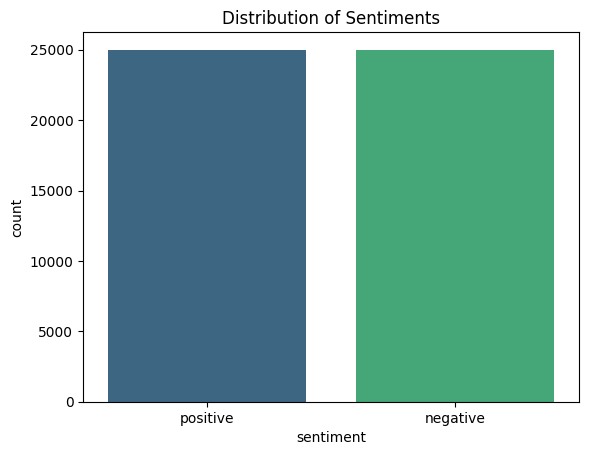

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of sentiments
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiments')
plt.show()


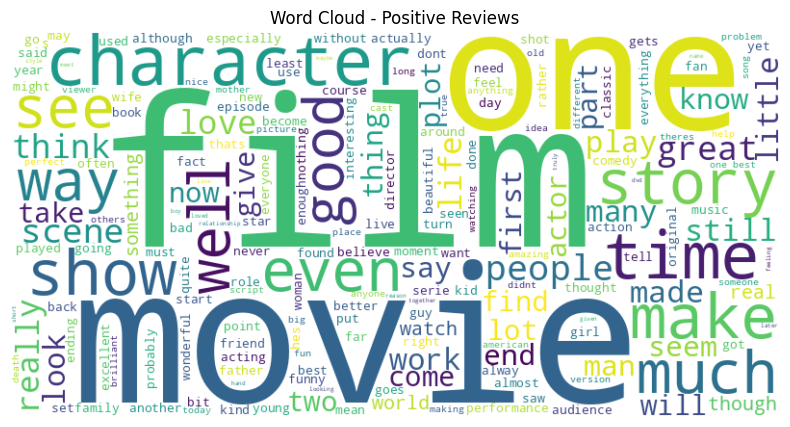

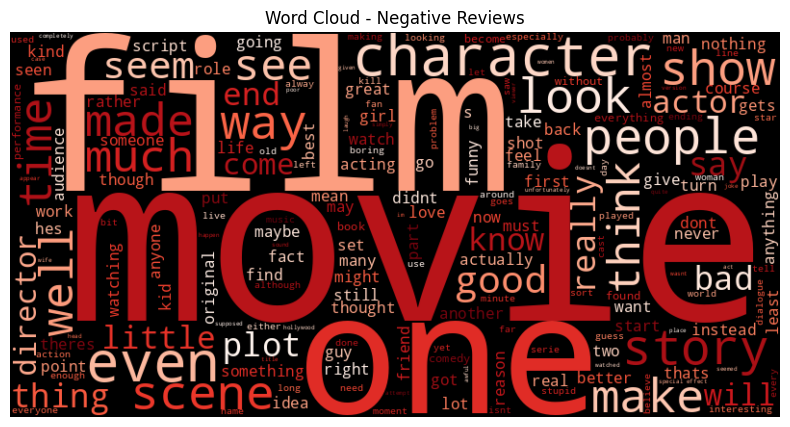

In [31]:
from wordcloud import WordCloud

# Word cloud for positive reviews
positive_text = ' '.join(df[df['sentiment'] == 'positive']['cleaned_review'])
positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Reviews')
plt.show()

# Word cloud for negative reviews
negative_text = ' '.join(df[df['sentiment'] == 'negative']['cleaned_review'])
negative_wc = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Reviews')
plt.show()


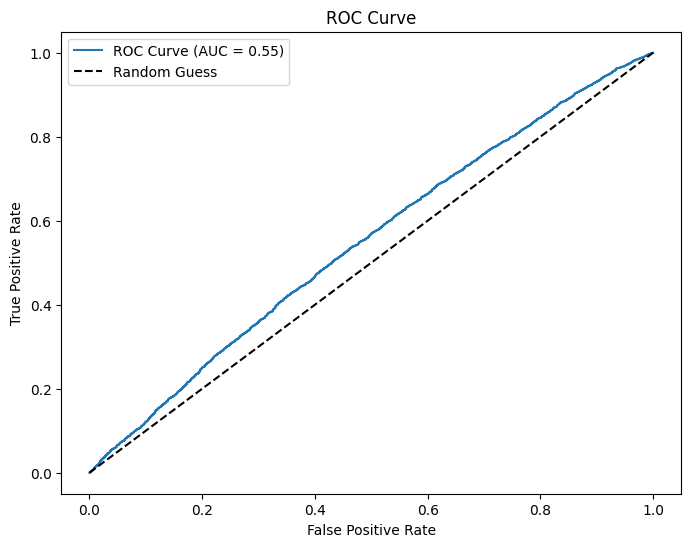

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_proba = model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [33]:
pip install shap


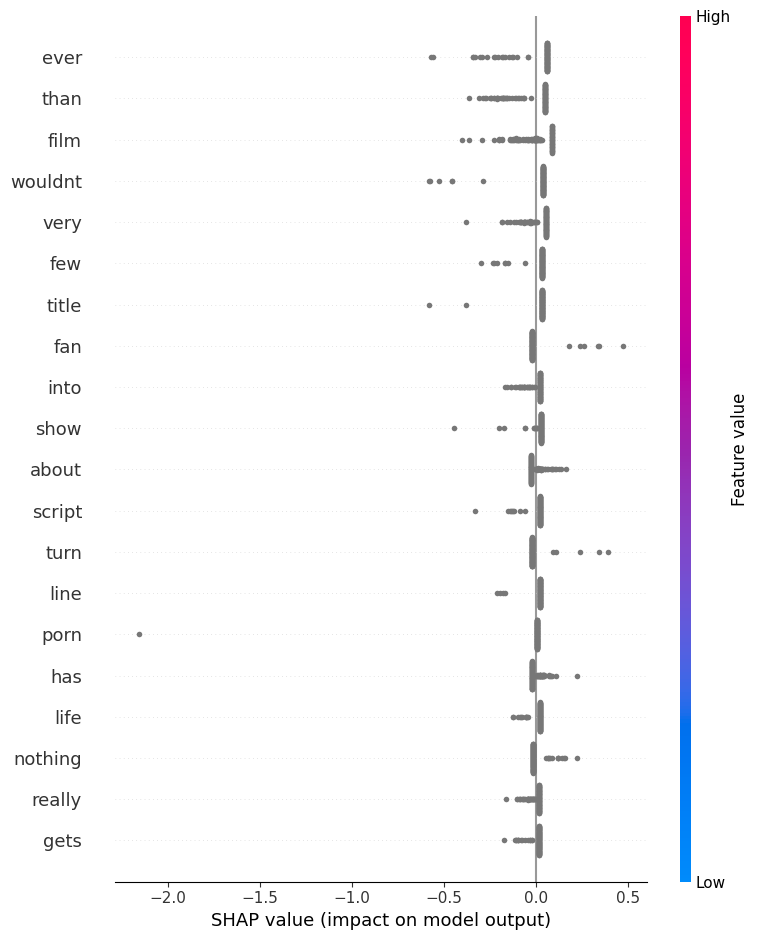

In [34]:
import shap

# Create explainer
explainer = shap.Explainer(model, X_train_tfidf)

# Get SHAP values
shap_values = explainer(X_test_tfidf[:100])

# Summary plot
shap.summary_plot(shap_values, feature_names=tfidf.get_feature_names_out())


In [35]:
# List of inappropriate words
inappropriate_words = {'porn', 'xxx', 'adult', 'sex', 'explicit'}  # Add more words as needed
# Function to filter reviews
def remove_inappropriate_reviews(review):
    return not any(word in review.lower() for word in inappropriate_words)

# Apply filtering
df = df[df['cleaned_review'].apply(remove_inappropriate_reviews)]

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_tfidf,y_train)

accuracy = model.score(X_test_tfidf,y_test)

print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 89.11%
